     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]
          Age  Annual Income (k$)  Spending Score (1-100)
0   -1.424569           -1.738999         

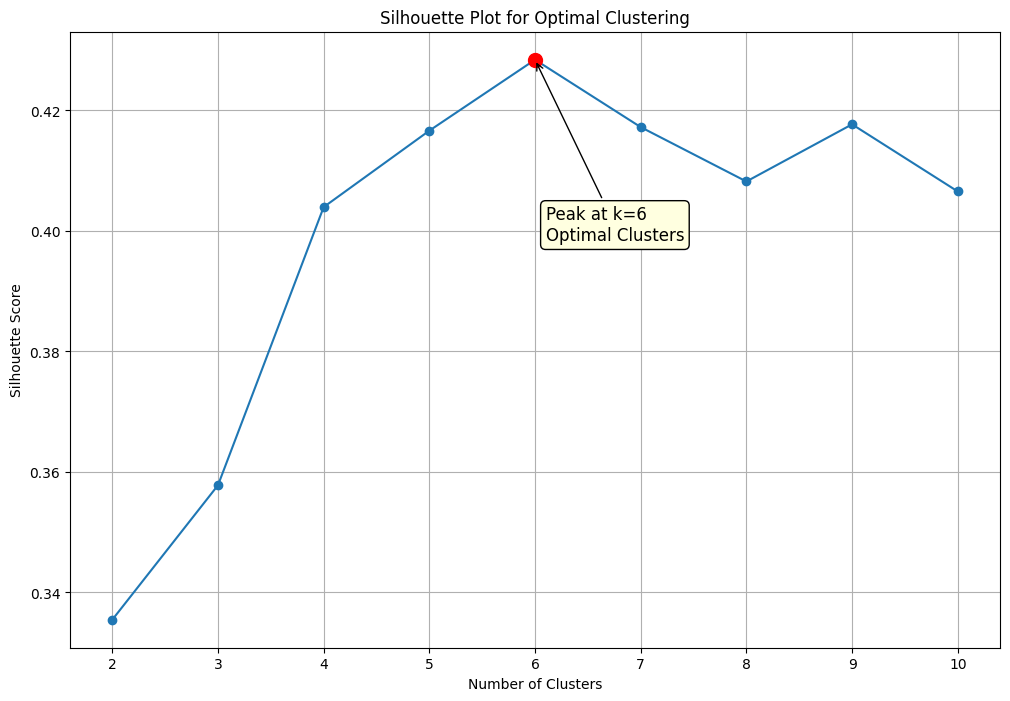

Optimal number of clusters selected: 6


In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
df = pd.read_csv('Mall_Customers.csv')
df["Gender"] = df["Gender"].map({'Male': 1, 'Female': 0})
print(df)
customer_id = df['CustomerID']
features = df.drop(columns = ['CustomerID',"Gender"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print(scaled_df)
silhouettescore = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    kmeans.fit(scaled_df)
    silhouettescore.append(silhouette_score(scaled_df,kmeans.labels_))
    print(f"k = {k}, Silhouette Score = {round(silhouette_score(scaled_df,kmeans.labels_),4)}")
plt.figure(figsize=(12, 8))
plt.plot(range(2, 11), silhouettescore, marker='o')
max_idx = silhouettescore.index(max(silhouettescore))
peak_k = range(2, 11)[max_idx]
peak_score = silhouettescore[max_idx]
plt.plot(peak_k, peak_score, 'ro', markersize=10)
plt.annotate(f'Peak at k={peak_k}\nOptimal Clusters',
             xy=(peak_k, peak_score),
             xytext=(peak_k + 0.1, peak_score - 0.03),
             arrowprops=dict(arrowstyle='->', color='black'),
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightyellow'),
             fontsize=12)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Plot for Optimal Clustering")
plt.xticks(range(2, 11))
plt.grid()
plt.show()
# Find optimal k (highest silhouette score)
optimal_k = range(2, 11)[silhouettescore.index(max(silhouettescore))]
print(f"Optimal number of clusters selected: {optimal_k}")

# Fit KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(scaled_df)
labels = np.array(kmeans.labels_)

labels_df = pd.DataFrame(labels, columns=['labels'])
labelled_df = pd.concat([df, labels_df], axis=1)
grouped_df = labelled_df.drop(columns = ['CustomerID','Gender']).groupby(labels)
grouped_df.agg({
    'Age': ['mean', 'std','count'],
    'Annual Income (k$)': ['mean', 'std','count'],
    'Spending Score (1-100)' : ['mean', 'std','count']}).round(2)
import plotly.express as px
import plotly.io as pio
from IPython.display import IFrame

fig = px.scatter_3d(
    labelled_df,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color=labels.astype(str),
    title="Customer Segments (3D)",
    labels={'color': 'Cluster'}
)
fig.show()